# Regresión Lineal Simple en Python 
### El paquete statsmodel para regresión lineal

In [54]:
import pandas as pd
import os 

In [55]:
mainpath= "d:/python-ml-course-master/datasets"
filename= "ads/Advertising.csv"
fullpath =os.path.join(mainpath, filename)
data = pd.read_csv(fullpath)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
import statsmodels.formula.api as smf

In [57]:
lm = smf.ols(formula= "Sales~TV", data = data).fit()

In [58]:
lm

In [59]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería
Sales = 7.032594 + 0.047537*TV

intercept: alpha

TV: betha

In [60]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [61]:
lm.rsquared

0.611875050850071

In [62]:
lm.rsquared_adj

0.6099148238341623

In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           1.47e-42
Time:                        21:28:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

In [65]:
import matplotlib.pyplot as plt

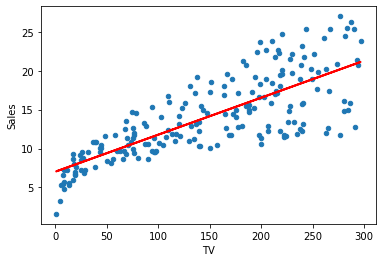

In [66]:
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, c = "red", linewidth = 2)

In [67]:
data["sales_pred"] = 7.032594 + 0.047537*data["TV"]

In [68]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [69]:
SSD = sum(data["RSE"])

In [70]:
import numpy as np
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [71]:
sales_m = np.mean(data["Sales"])

In [72]:
sales_m

14.0225

In [73]:
error= RSE/sales_m
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

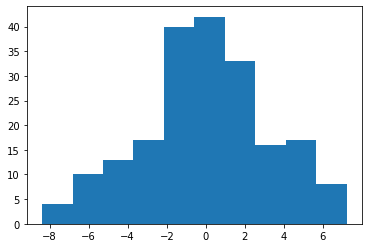

In [74]:
plt.hist(data["Sales"]-data["sales_pred"])

# Regresión Lineal Múltiple en Python.
### El paquete statsmodel para Regresión Múltiple.
* Sales -TV.
* Sales -Newspaper.
* Sales -Radio.
* Sales -TV+Newspaper.
* Sales -TV-Radio.
* Sales -Newspaper+Radio.
* Sales -TV+Newspaper+Radio.

In [75]:
#Añadir el Newspaper al modelo existente.
lm2 = smf.ols(formula = "Sales~TV+Newspaper", data = data).fit()

In [76]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [77]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

### Sales = 5.774948 + 0.046901 TV + 0.044219 Newspaper

In [78]:
lm2.rsquared

0.6458354938293273

In [79]:
lm2.rsquared_adj

0.6422399150864777

In [80]:
sales_pred = lm2.predict(data[["TV","Newspaper"]])
sales_pred

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [81]:
SSD= sum((data["Sales"]-sales_pred)**2)
SSD

1918.561811896827

In [82]:
RSE= np.sqrt(SSD/(len(data)-3))
RSE

3.120719860252885

In [83]:
error= RSE/sales_m
error

0.2225508903728212

In [84]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           3.95e-45
Time:                        21:28:55   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
#Añadir el Radio al modelo existente.
lm3 = smf.ols(formula = "Sales~TV+Radio", data = data).fit()

In [86]:
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           4.83e-98
Time:                        21:28:55   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
sales_pred = lm3.predict(data[["TV","Radio"]])
sales_pred

0      20.555465
1      12.345362
2      12.337018
3      17.617116
4      13.223908
         ...    
195     5.364512
196     8.152375
197    12.768048
198    23.792923
199    15.157543
Length: 200, dtype: float64

In [88]:
SSD= sum((data["Sales"]-sales_pred)**2)
SSD

556.9139800676181

In [89]:
RSE= np.sqrt(SSD/(len(data)-3))
RSE

1.6813609125080007

In [90]:
error= RSE/sales_m
error

0.11990450436855059

In [91]:
lm4 = smf.ols(formula = "Sales~TV+Newspaper+Radio", data = data).fit()

In [92]:
lm4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 23 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        21:28:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
sales_pred = lm4.predict(data[["TV","Newspaper", "Radio"]])
sales_pred


0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [94]:
SSD= sum((data["Sales"]-sales_pred)**2)
SSD

556.8252629021872

In [95]:
RSE= np.sqrt(SSD/(len(data)-4))
RSE

1.685510373414744

In [96]:
error= RSE/sales_m
error

0.1202004188564624

## Multicolinealidad
## Factor inflación de la Varianza
* VIF = 1 : Las varibales no están correlacionadas
* VIF < 5 : Las varibales tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5 : Las variables están altamente correlacionadas y deben desaparecer del modelo.

In [99]:
# Newspaper  ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula= "Newspaper~TV+Radio", data = data).fit()
rssquared_n= lm_n.rsquared
VIF = 1/(1-rssquared_n)
VIF

1.1451873787239286

In [100]:
# TV  ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula= "TV~Newspaper+Radio", data = data).fit()
rssquared_tv= lm_tv.rsquared
VIF = 1/(1-rssquared_tv)
VIF

1.0046107849396502

In [101]:
# Radio  ~ Newspaper + TV -> R^2 VIF = 1/(1-R^2)
lm_r = smf.ols(formula= "Radio~Newspaper+TV", data = data).fit()
rssquared_r= lm_r.rsquared
VIF = 1/(1-rssquared_r)
VIF

1.1449519171055353